In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip -uq "/content/drive/My Drive/Mini Project.zip" 

In [ ]:
!unzip -d "/content/drive/My Drive/Mini Project.zip"

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path_to_zip = tf.keras.utils.get_file('Mini Project.zip',origin="https://drive.google.com/drive/search?q=Mini%20Project.zip",extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'Mini Project')

In [ ]:
PATH = os.path.join('/content/Mini Project/')

In [ ]:
PATH

'/content/Mini Project/'

In [ ]:
train_dir = os.path.join(PATH, 'train')

In [ ]:
corona_dir = os.path.join(train_dir, 'corona')
rabies_dir = os.path.join(train_dir, 'rabies')

In [ ]:
corona_tr = len(os.listdir(corona_dir))
rabies_tr = len(os.listdir(rabies_dir))
total_train = corona_tr + rabies_tr


In [ ]:
print(corona_tr)
print(rabies_tr)
print(total_train)



50
50
100


In [ ]:
batch_size = 3
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 100 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1,3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

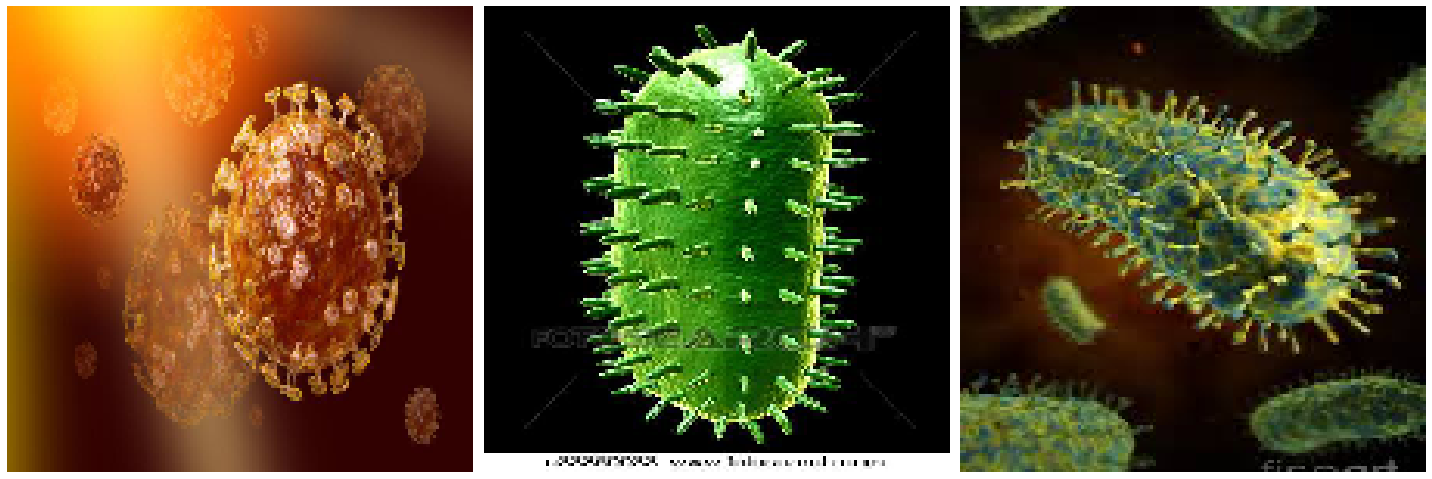

In [ ]:
plotImages(sample_training_images[:3])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)            

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs#,
    #validation_data=val_data_gen,
    #validation_steps=total_val // batch_size
)

Epoch 1/10
33/33 [==============================] - 8s 245ms/step - loss: 0.9675 - accuracy: 0.5670
Epoch 2/10
33/33 [==============================] - 8s 244ms/step - loss: 0.5948 - accuracy: 0.6495
Epoch 3/10
33/33 [==============================] - 8s 246ms/step - loss: 0.5897 - accuracy: 0.7010
Epoch 4/10
33/33 [==============================] - 8s 240ms/step - loss: 0.4224 - accuracy: 0.7732
Epoch 5/10
33/33 [==============================] - 8s 241ms/step - loss: 0.3915 - accuracy: 0.8144
Epoch 6/10
33/33 [==============================] - 8s 242ms/step - loss: 0.3284 - accuracy: 0.8660
Epoch 7/10
33/33 [==============================] - 8s 242ms/step - loss: 0.1912 - accuracy: 0.9175
Epoch 8/10
33/33 [==============================] - 8s 242ms/step - loss: 0.3178 - accuracy: 0.9381
Epoch 9/10
33/33 [==============================] - 8s 244ms/step - loss: 0.0890 - accuracy: 0.9794
Epoch 10/10
33/33 [==============================] - 8s 243ms/step - loss: 0.0903 - accuracy: 0.9691

In [ ]:
!wget "https://drive.google.com/drive/search?q=corona_test"

--2020-06-17 11:04:41--  https://drive.google.com/drive/search?q=corona_test
Resolving drive.google.com (drive.google.com)... 74.125.204.101, 74.125.204.100, 74.125.204.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/search?q%3Dcorona_test&followup=https://drive.google.com/drive/search?q%3Dcorona_test [following]
--2020-06-17 11:04:41--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/search?q%3Dcorona_test&followup=https://drive.google.com/drive/search?q%3Dcorona_test
Resolving accounts.google.com (accounts.google.com)... 74.125.203.84, 2404:6800:4008:c03::54
Connecting to accounts.google.com (accounts.google.com)|74.125.203.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified 

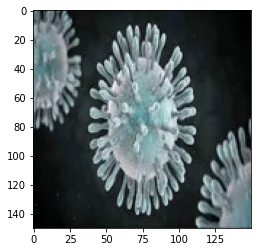

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/My Drive/corona_test.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

# model.save("model.h5")
# model()

In [ ]:
img_cvt.shape
cv2.imwrite("/content/drive/My Drive/corona_test.jpg",img_cvt)

True

In [ ]:
f = img_cvt[None,:,:,:]

In [ ]:
f.shape

(1, 150, 150, 3)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)            

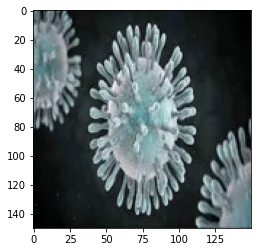

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_cvt)

PREDICTION

In [ ]:
y=model.predict(f)

In [ ]:
y

array([[0.]], dtype=float32)

In [ ]:
if(y[0][0]==1.0):
  print("Rabies Virus")
else:
  print("Corona Virus")

Corona Virus
